# YouTube Trend Analysis

Description taken from [this kaggle page](https://www.kaggle.com/datasnaek/youtube-new).

Dataset available [here](https://www.kaggle.com/datasnaek/youtube-new/downloads/youtube-new.zip/68).

Data Incubator Challenge [1st Plot](#plot1)

Data Incubator Challenge [2nd Plot](#plot2)

### Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

Note that this dataset is a structurally improved version of this dataset.

### Content
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.

### Acknowledgements
This dataset was collected using the YouTube API.



*This analysis project is still in progress*.

In [1]:
import re
import json
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from wordcloud import WordCloud, STOPWORDS
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
plt.style.use('seaborn-white')
init_notebook_mode(connected = True)

In [2]:
# read csv files
ca_vid_df = pd.read_csv('data/CAvideos.csv')
de_vid_df = pd.read_csv('data/DEvideos.csv')
fr_vid_df = pd.read_csv('data/FRvideos.csv')
gb_vid_df = pd.read_csv('data/GBvideos.csv')
us_vid_df = pd.read_csv('data/USvideos.csv')

In [3]:
ca_vid_df.rename(columns = {'trending_date': 'date'}, inplace = True)
de_vid_df.rename(columns = {'trending_date': 'date'}, inplace = True)
fr_vid_df.rename(columns = {'trending_date': 'date'}, inplace = True)
gb_vid_df.rename(columns = {'trending_date': 'date'}, inplace = True)
us_vid_df.rename(columns = {'trending_date': 'date'}, inplace = True)

Since we will be trending based on the dates, it is a good idea to check if the date column contains any faulty data.

In [4]:
print('ca_vid_df: \n{}'.format(ca_vid_df['date'].unique()))
print('de_vid_df: \n{}'.format(de_vid_df['date'].unique()))
print('fr_vid_df: \n{}'.format(fr_vid_df['date'].unique()))
print('gb_vid_df: \n{}'.format(gb_vid_df['date'].unique()))
print('us_vid_df: \n{}'.format(us_vid_df['date'].unique()))

ca_vid_df: 
['17.14.11' '17.15.11' '17.16.11' '17.17.11' '17.18.11' '17.19.11'
 '17.20.11' '17.21.11' '17.22.11' '17.23.11' '17.24.11' '17.25.11'
 '17.26.11' '17.27.11' '17.28.11' '17.29.11' '17.30.11' '17.01.12'
 '17.02.12' '17.03.12' '17.04.12' '17.05.12' '17.06.12' '17.07.12'
 '17.08.12' '17.09.12' '17.10.12' '17.11.12' '17.12.12' '17.13.12'
 '17.14.12' '17.15.12' '17.16.12' '17.17.12' '17.18.12' '17.19.12'
 '17.20.12' '17.21.12' '17.22.12' '17.23.12' '17.24.12' '17.25.12'
 '17.26.12' '17.27.12' '17.28.12' '17.29.12' '17.30.12' '17.31.12'
 '18.01.01' '18.02.01' '18.03.01' '18.04.01' '18.05.01' '18.06.01'
 '18.07.01' '18.08.01' '18.09.01' '18.12.01' '18.13.01' '18.14.01'
 '18.15.01' '18.16.01' '18.17.01' '18.18.01' '18.19.01' '18.20.01'
 '18.21.01' '18.22.01' '18.23.01' '18.24.01' '18.25.01' '18.26.01'
 '18.27.01' '18.28.01' '18.29.01' '18.30.01' '18.31.01' '18.01.02'
 '18.02.02' '18.03.02' '18.04.02' '18.05.02' '18.06.02' '18.07.02'
 '18.08.02' '18.09.02' '18.10.02' '18.11.02' '18.1

fr_vid_df has a faulty date (29441) - let's find the row(s) with that date

In [5]:
fr_vid_df[fr_vid_df.date == '29441']

,video_id,date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
18055,"\n Laeticia Hallyday""|""Johnny Hallyday""|""comme...",29441,71,39,129,https://i.ytimg.com/vi/diB8l9EcKk8/default.jpg,False,False,False,Laura Smet veut contes­ter le testa­ment de Jo...,NaN,NaN,NaN,NaN,NaN,NaN


This is the row with index 18055. We can drop this since it doesn't contain data of interest.

In [6]:
# drop row which shows faulty data
fr_vid_df = fr_vid_df.drop(fr_vid_df.index[18055])

In [7]:
fr_vid_df['date'].unique()

array(['17.14.11', '17.15.11', '17.16.11', '17.17.11', '17.18.11',
       '17.19.11', '17.20.11', '17.21.11', '17.22.11', '17.23.11',
       '17.24.11', '17.25.11', '17.26.11', '17.27.11', '17.28.11',
       '17.29.11', '17.30.11', '17.01.12', '17.02.12', '17.03.12',
       '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12',
       '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12',
       '17.14.12', '17.15.12', '17.16.12', '17.17.12', '17.18.12',
       '17.19.12', '17.20.12', '17.21.12', '17.22.12', '17.23.12',
       '17.24.12', '17.25.12', '17.26.12', '17.27.12', '17.28.12',
       '17.29.12', '17.30.12', '17.31.12', '18.01.01', '18.02.01',
       '18.03.01', '18.04.01', '18.05.01', '18.06.01', '18.07.01',
       '18.08.01', '18.09.01', '18.12.01', '18.13.01', '18.14.01',
       '18.15.01', '18.16.01', '18.17.01', '18.18.01', '18.19.01',
       '18.20.01', '18.21.01', '18.22.01', '18.23.01', '18.24.01',
       '18.25.01', '18.26.01', '18.27.01', '18.28.01', '18.29.

We will also read in the json category_id files.

These files contain details for the video categories, including a description for each numerical category id. We can take a look at what the information in these files looks like:

In [8]:
# read json category_id files
ca_cat_details = pd.read_json('data/CA_category_id.json')['items']

In [9]:
ca_cat_details.iloc[0]

{'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'kind': 'youtube#videoCategory',
 'snippet': {'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation'}}

Based on the structure of the category_id files, we will write a function to extract the category ids and their descriptions:

In [10]:
def get_cat_dict(country_identifier):
    
    cat_dict = {}
    cat_details = pd.read_json('data/' + country_identifier + '_category_id.json')['items']
    
    for i in range(len(cat_details)):
        cat_dict[int(cat_details[i]['id'])] = cat_details[i]['snippet']['title']
        
    return cat_dict

Now we can get a dictionary of category ids and their descriptions, for each country.

In [11]:
ca_cat_dict = get_cat_dict('CA')
de_cat_dict = get_cat_dict('DE')
fr_cat_dict = get_cat_dict('FR')
gb_cat_dict = get_cat_dict('GB')
us_cat_dict = get_cat_dict('US')

Let's take a look at one of the category dictionaries:

In [12]:
de_cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

This is great! Now we are ready to combine information from the video tables and the category dictionaries and carry out some analysis.

First we will extract the columns of interest from the video tables:

In [13]:
columns = ['video_id', 'date', 'title', 'channel_title', 'category_id',
          'tags', 'views', 'likes', 'dislikes', 'comment_count',
          'thumbnail_link', 'description']

In [14]:
ca_vids = ca_vid_df[columns]
de_vids = de_vid_df[columns]
fr_vids = fr_vid_df[columns]
gb_vids = gb_vid_df[columns]
us_vids = us_vid_df[columns]

We will now include a 'category' column to contain the category description based on the ids in the 'category_id' column.

But first, we need to check if there are any category ids in the video tables that do not appear in the category dictionaries:

In [15]:
print('ca_vids: {}'.format(set(ca_vids['category_id']) - set(ca_cat_dict.keys())))
print('de_vids: {}'.format(set(de_vids['category_id']) - set(de_cat_dict.keys())))
print('fr_vids: {}'.format(set(fr_vids['category_id']) - set(fr_cat_dict.keys())))
print('gb_vids: {}'.format(set(gb_vids['category_id']) - set(gb_cat_dict.keys())))
print('us_vids: {}'.format(set(us_vids['category_id']) - set(us_cat_dict.keys())))

ca_vids: {29}
de_vids: {29}
fr_vids: {29}
gb_vids: {29}
us_vids: set()


All the tables apart from the US table include a category id 29 that is not defined in the json files. According to the [YouTube API](https://developers.google.com/youtube/v3/docs/videoCategories/list), this category id represents Nonprofits & Activism. We will add this description to the category dictionaries before adding the category column to the tables:

In [16]:
ca_cat_dict[29] = 'Nonprofits & Activism'
de_cat_dict[29] = 'Nonprofits & Activism'
fr_cat_dict[29] = 'Nonprofits & Activism'
gb_cat_dict[29] = 'Nonprofits & Activism'
us_cat_dict[29] = 'Nonprofits & Activism'

Now we can add a column named 'category' to the video tables. The function get_cat_descriptions will help us do that:

In [17]:
def get_cat_descriptions(table, dictionary):
    
    descriptions = []
    
    for cat_id in table['category_id']:
        descriptions.append(dictionary[cat_id])
        
    return descriptions

In [18]:
ca_vids = ca_vids.assign(category = get_cat_descriptions(ca_vids, ca_cat_dict))
de_vids = de_vids.assign(category = get_cat_descriptions(de_vids, de_cat_dict))
fr_vids = fr_vids.assign(category = get_cat_descriptions(fr_vids, fr_cat_dict))
gb_vids = gb_vids.assign(category = get_cat_descriptions(gb_vids, gb_cat_dict))
us_vids = us_vids.assign(category = get_cat_descriptions(us_vids, us_cat_dict))

Sure enough, the new column has been added:

In [19]:
gb_vids.head()

,video_id,date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,Musical guest Taylor Swift performs …Ready for...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,Eminem's new track Walk on Water ft. Beyoncé i...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,Salford drew 4-4 against the Class of 92 and F...,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,Dashcam captures truck's near miss with child ...,News & Politics


One last thing we will do is drop any duplicate rows from out tables

In [20]:
print('Before removing duplicates')
print('ca_vids: {} rows'.format(len(ca_vids)))
print('de_vids: {} rows'.format(len(de_vids)))
print('fr_vids: {} rows'.format(len(fr_vids)))
print('gb_vids: {} rows'.format(len(gb_vids)))
print('us_vids: {} rows'.format(len(us_vids)))

ca_vids = ca_vids.drop_duplicates()
de_vids = de_vids.drop_duplicates()
fr_vids = fr_vids.drop_duplicates()
gb_vids = gb_vids.drop_duplicates()
us_vids = us_vids.drop_duplicates()

print('\nAfter removing duplicates')
print('ca_vids: {} rows'.format(len(ca_vids)))
print('de_vids: {} rows'.format(len(de_vids)))
print('fr_vids: {} rows'.format(len(fr_vids)))
print('gb_vids: {} rows'.format(len(gb_vids)))
print('us_vids: {} rows'.format(len(us_vids)))

Before removing duplicates
ca_vids: 29319 rows
de_vids: 29340 rows
fr_vids: 29269 rows
gb_vids: 29158 rows
us_vids: 29350 rows

After removing duplicates
ca_vids: 29319 rows
de_vids: 29340 rows
fr_vids: 29269 rows
gb_vids: 29158 rows
us_vids: 29350 rows


It appears there were no duplicate rows

Now we can begin some general analysis!

What period does the data cover?

In [21]:
dates = ca_vids['date'].unique()
print('Start date: {}'.format(dates[0]))  
print('End date: {}'.format(dates[-1]))
print('Duration: {} days ({} months)'.format(len(dates), len(dates)//30))

Start date: 17.14.11
End date: 18.17.04
Duration: 147 days (4 months)


We will combine the tables into one for easier handling. Before doing so, we will include a column in each table to help us identify the country to which the data belongs.

In [22]:
# Dictionary of country-table references
tables = {'Canada': ca_vids,
          'Germany': de_vids,
          'France': fr_vids,
          'UK': gb_vids,
          'USA': us_vids}

# Insert a column named 'country' in each table
for country in tables:
    tables[country]['country'] = [country] * len(tables[country])

We can now combine the tables

In [23]:
# Combine the tables into one
all_vids = pd.concat([ca_vids, de_vids, fr_vids, gb_vids, us_vids], ignore_index = True)

Now we can check out some trends.

 1. How long do videos tend to stay trending per country?
 2. Which video categories trend the longest?
 3. Which particular youtube channels are trending the longest?
 
We will write a function to help us answer these questions.

In [24]:
def trend_durations(item_id, vid_tables, output_proportion = 1):
    
    ca_vids = vid_tables[vid_tables.country == 'Canada']
    de_vids = vid_tables[vid_tables.country == 'Germany']
    fr_vids = vid_tables[vid_tables.country == 'France']
    gb_vids = vid_tables[vid_tables.country == 'UK']
    us_vids = vid_tables[vid_tables.country == 'USA']
    
    #Number of days trended (trend duration) per item_id
    ca_duration_per_item = pd.DataFrame(ca_vids[[item_id, 'date']].groupby(item_id).date.nunique().sort_values(ascending = False))
    de_duration_per_item = pd.DataFrame(de_vids[[item_id, 'date']].groupby(item_id).date.nunique().sort_values(ascending = False))
    fr_duration_per_item = pd.DataFrame(fr_vids[[item_id, 'date']].groupby(item_id).date.nunique().sort_values(ascending = False))
    gb_duration_per_item = pd.DataFrame(gb_vids[[item_id, 'date']].groupby(item_id).date.nunique().sort_values(ascending = False))
    us_duration_per_item = pd.DataFrame(us_vids[[item_id, 'date']].groupby(item_id).date.nunique().sort_values(ascending = False))

    # Rename 'date' column to 'duration' for clarity
    ca_duration_per_item.rename(columns = {'date': 'duration'}, inplace = True)
    de_duration_per_item.rename(columns = {'date': 'duration'}, inplace = True)
    fr_duration_per_item.rename(columns = {'date': 'duration'}, inplace = True)
    gb_duration_per_item.rename(columns = {'date': 'duration'}, inplace = True)
    us_duration_per_item.rename(columns = {'date': 'duration'}, inplace = True)

    # Reset index to revert to expected table structure and prevent out_of_index error
    ca_duration_per_item.reset_index(inplace = True)
    de_duration_per_item.reset_index(inplace = True)
    fr_duration_per_item.reset_index(inplace = True)
    gb_duration_per_item.reset_index(inplace = True)
    us_duration_per_item.reset_index(inplace = True)
    
    # The next step will be to group by duration, but this will cause us to lose the information contained within item_id.
    # In order to retain that information, we will construct tables to hold item_id information when grouped by duration
    # Note: the count() function here is simply to help us return a dataframe from the groupby() call; it will not count the items per group
    ca_item_id_info = ca_duration_per_item.groupby([item_id, 'duration']).count().reset_index()
    de_item_id_info = de_duration_per_item.groupby([item_id, 'duration']).count().reset_index()
    fr_item_id_info = fr_duration_per_item.groupby([item_id, 'duration']).count().reset_index()
    gb_item_id_info = gb_duration_per_item.groupby([item_id, 'duration']).count().reset_index()
    us_item_id_info = us_duration_per_item.groupby([item_id, 'duration']).count().reset_index()
    
    # Now we can group by duration to get actual group counts
    # Number of item_id's per trend duration
    ca_items_per_duration = ca_duration_per_item.groupby('duration', as_index = False).count().sort_values('duration', ascending = False)
    de_items_per_duration = de_duration_per_item.groupby('duration', as_index = False).count().sort_values('duration', ascending = False)
    fr_items_per_duration = fr_duration_per_item.groupby('duration', as_index = False).count().sort_values('duration', ascending = False)
    gb_items_per_duration = gb_duration_per_item.groupby('duration', as_index = False).count().sort_values('duration', ascending = False)
    us_items_per_duration = us_duration_per_item.groupby('duration', as_index = False).count().sort_values('duration', ascending = False)

    # Rename item_id column to 'num_items' for clarity
    ca_items_per_duration.rename(columns = {item_id: 'num_items'}, inplace = True)
    de_items_per_duration.rename(columns = {item_id: 'num_items'}, inplace = True)
    fr_items_per_duration.rename(columns = {item_id: 'num_items'}, inplace = True)
    gb_items_per_duration.rename(columns = {item_id: 'num_items'}, inplace = True)
    us_items_per_duration.rename(columns = {item_id: 'num_items'}, inplace = True)

    # This step is necessary to help us plot num_items on the x-axis without sorting them.
    # Since barplot sorts numerical axes values, will plot with the re-indexed values and then label with the values of num_items
    # Courtesy: https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering
    ca_items_per_duration.reset_index(inplace = True)
    de_items_per_duration.reset_index(inplace = True)
    fr_items_per_duration.reset_index(inplace = True)
    gb_items_per_duration.reset_index(inplace = True)
    us_items_per_duration.reset_index(inplace = True)

    # Total number of trending videos per country
    total_items = {'country': ['Canada', 'Germany', 'France', 'GB', 'US'],
                  'item_sum': [ca_items_per_duration['num_items'].sum(),
                               de_items_per_duration['num_items'].sum(),
                               fr_items_per_duration['num_items'].sum(),
                               gb_items_per_duration['num_items'].sum(),
                               us_items_per_duration['num_items'].sum()]}

    item_totals = pd.DataFrame(total_items).sort_values('item_sum', ascending = False)

    
    #----CHARTS----
    
    item = item_id.split('_')[0]
    
    x_axis_label = item.capitalize() + ' count'
    y_axis_label = 'Number of days trending'
    
    # Combined plot
    fig = plt.figure(figsize = (18, 14))
    gs = gridspec.GridSpec(5, 2, height_ratios = [1, 0.2, 1, 0.2, 1], width_ratios = [1, 1])

    # List of color palettes: http://jose-coto.com/styling-with-seaborn
    # Plot of total number of trending videos per country
    ax1 = plt.subplot(gs[0, 0])
    ax1 = sns.barplot(x = 'country', y = 'item_sum', data = item_totals, palette = 'Greys_r')
    ax1.set_xlabel('Country', fontsize = 12)
    ax1.set_ylabel(item.capitalize() + ' count', fontsize = 12)
    ax1.set_title('Trending ' + item + ' count per country', fontsize = 15)

    # Plot of number of videos in each duration category
    # Canada
    ax2 = plt.subplot(gs[0, 1])
    ca_items_per_duration = ca_items_per_duration[:int(output_proportion * len(ca_items_per_duration))]
    ax2 = sns.barplot(x = ca_items_per_duration.index, y = 'duration', data = ca_items_per_duration, palette = 'Reds_r')
    ax2.set_xticklabels(ca_items_per_duration.num_items)
    ax2.set_xlabel(x_axis_label, fontsize = 12)
    ax2.set_ylabel(y_axis_label, fontsize = 12)
    ax2.set_title('Canada', fontsize = 15)

    # Germany
    ax3 = plt.subplot(gs[2, 0])
    de_items_per_duration = de_items_per_duration[:int(output_proportion * len(de_items_per_duration))]
    ax3 = sns.barplot(x = de_items_per_duration.index, y = 'duration', data = de_items_per_duration, palette = 'Oranges_r')
    ax3.set_xticklabels(de_items_per_duration.num_items)
    ax3.set_xlabel(x_axis_label, fontsize = 12)
    ax3.set_ylabel(y_axis_label, fontsize = 12)
    ax3.set_title('Germany', fontsize = 15)

    # France
    ax4 = plt.subplot(gs[2, 1])
    fr_items_per_duration = fr_items_per_duration[:int(output_proportion * len(fr_items_per_duration))]
    ax4 = sns.barplot(x = fr_items_per_duration.index, y = 'duration', data = fr_items_per_duration, palette = 'Blues_r')
    ax4.set_xticklabels(fr_items_per_duration.num_items)
    ax4.set_xlabel(x_axis_label, fontsize = 12)
    ax4.set_ylabel(y_axis_label, fontsize = 12)
    ax4.set_title('France', fontsize = 15)

    # Great Britain
    ax5 = plt.subplot(gs[4, 0])
    gb_items_per_duration = gb_items_per_duration[:int(output_proportion * len(gb_items_per_duration))]
    ax5 = sns.barplot(x = gb_items_per_duration.index, y = 'duration', data = gb_items_per_duration, palette = 'Reds_r')
    # this if block is necessary because the GB chart displays many results, making the x-labels difficult to read
    if item_id == 'video_id': 
        ax5.set_xticklabels(gb_items_per_duration.num_items, rotation = 90)
    else:
        ax5.set_xticklabels(gb_items_per_duration.num_items)
    ax5.set_xlabel(x_axis_label, fontsize = 12)
    ax5.set_ylabel(y_axis_label, fontsize = 12)
    ax5.set_title('Great Britain', fontsize = 15)

    # United States
    ax6 = plt.subplot(gs[4, 1])
    us_items_per_duration = us_items_per_duration[:int(output_proportion * len(us_items_per_duration))]
    ax6 = sns.barplot(x = us_items_per_duration.index, y = 'duration', data = us_items_per_duration, palette = 'Blues_r')
    ax6.set_xticklabels(us_items_per_duration.num_items)
    ax6.set_xlabel(x_axis_label, fontsize = 12)
    ax6.set_ylabel(y_axis_label, fontsize = 12)
    ax6.set_title('United States', fontsize = 15)

    plt.show()
    
    # Data to return
    ca_output = [ca_items_per_duration, ca_item_id_info]
    de_output = [de_items_per_duration, de_item_id_info]
    fr_output = [fr_items_per_duration, fr_item_id_info]
    gb_output = [gb_items_per_duration, gb_item_id_info]
    us_output = [us_items_per_duration, us_item_id_info]
    
    return [ca_output, de_output, fr_output, gb_output, us_output]

We can answer some questions now.

 - How long do videos tend to stay trending per country?

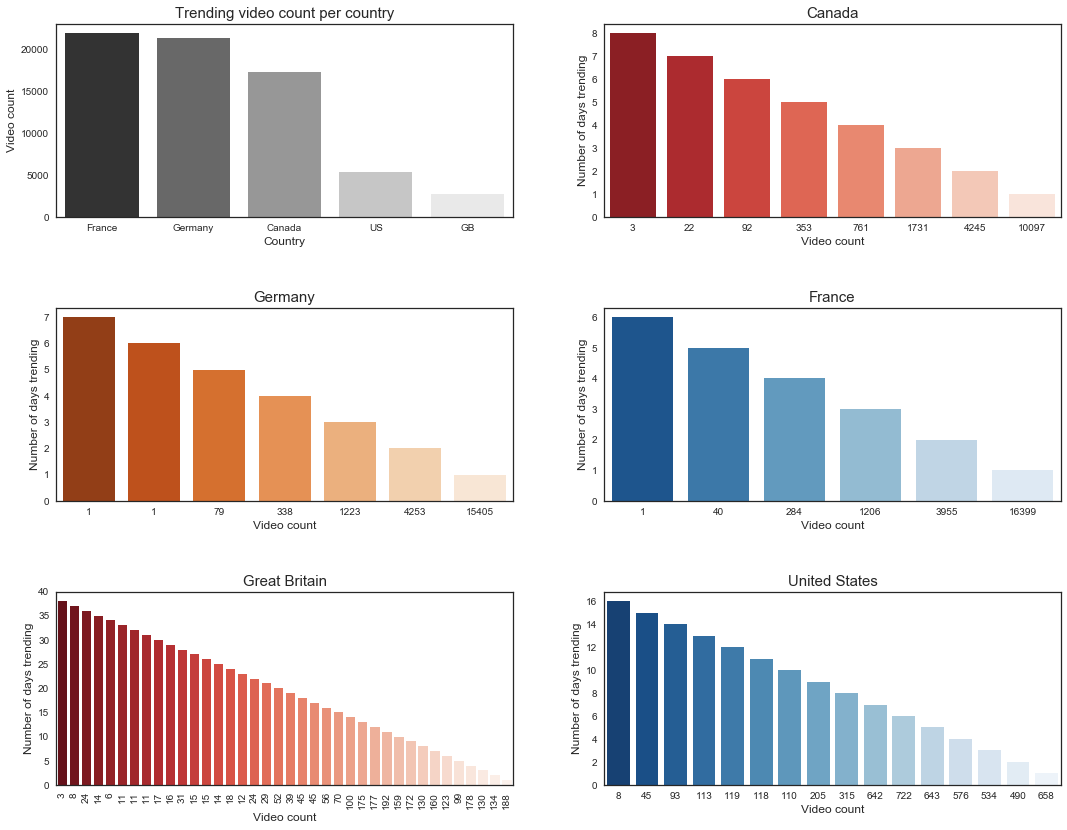

In [25]:
vid_trends = trend_durations('video_id', all_vids)

These charts are interesting: they show that videos tend to stay trending for much longer in a country like the UK than in other countries.

In order to see the contrasts more clearly, we can chart the highest trend duration from each country on one chart:

<a id="plot1"></a>

### Plot1

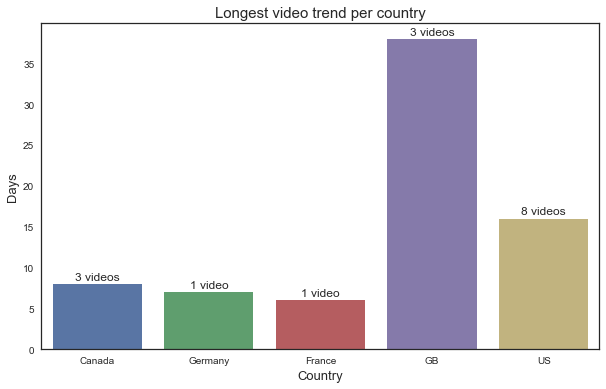

In [26]:
ca_vid_output = vid_trends[0]
de_vid_output = vid_trends[1]
fr_vid_output = vid_trends[2]
gb_vid_output = vid_trends[3]
us_vid_output = vid_trends[4]

longest_trends_dict_v = {'country': ['Canada', 'Germany', 'France', 'GB', 'US'],
                         'duration': [ca_vid_output[0]['duration'].iloc[0],
                                      de_vid_output[0]['duration'].iloc[0],
                                      fr_vid_output[0]['duration'].iloc[0],
                                      gb_vid_output[0]['duration'].iloc[0],
                                      us_vid_output[0]['duration'].iloc[0]],
                         'num_vids': [ca_vid_output[0]['num_items'].iloc[0],
                                      de_vid_output[0]['num_items'].iloc[0],
                                      fr_vid_output[0]['num_items'].iloc[0],
                                      gb_vid_output[0]['num_items'].iloc[0],
                                      us_vid_output[0]['num_items'].iloc[0]]}

longest_trends_v = pd.DataFrame(longest_trends_dict_v)

ax = plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'country', y = 'duration', data = longest_trends_v)

# Annotate each bar with number of videos in that category
for country, duration, vid_count in zip(ax.get_xticks(), longest_trends_v['duration'], longest_trends_v['num_vids']):
    ax.text(x = country,
            y = duration + 0.5,
            s = '{} videos'.format(vid_count) if vid_count > 1 else '{} video'.format(vid_count),
            size = 12,
            ha = 'center')

ax.set_xlabel('Country', fontsize = 13)
ax.set_ylabel('Days', fontsize = 13)
ax.set_title('Longest video trend per country', fontsize = 15)

plt.show()

This is interesting - the British appear to be by far the most 'video-faithful'.

 - Which video categories trend the longest?

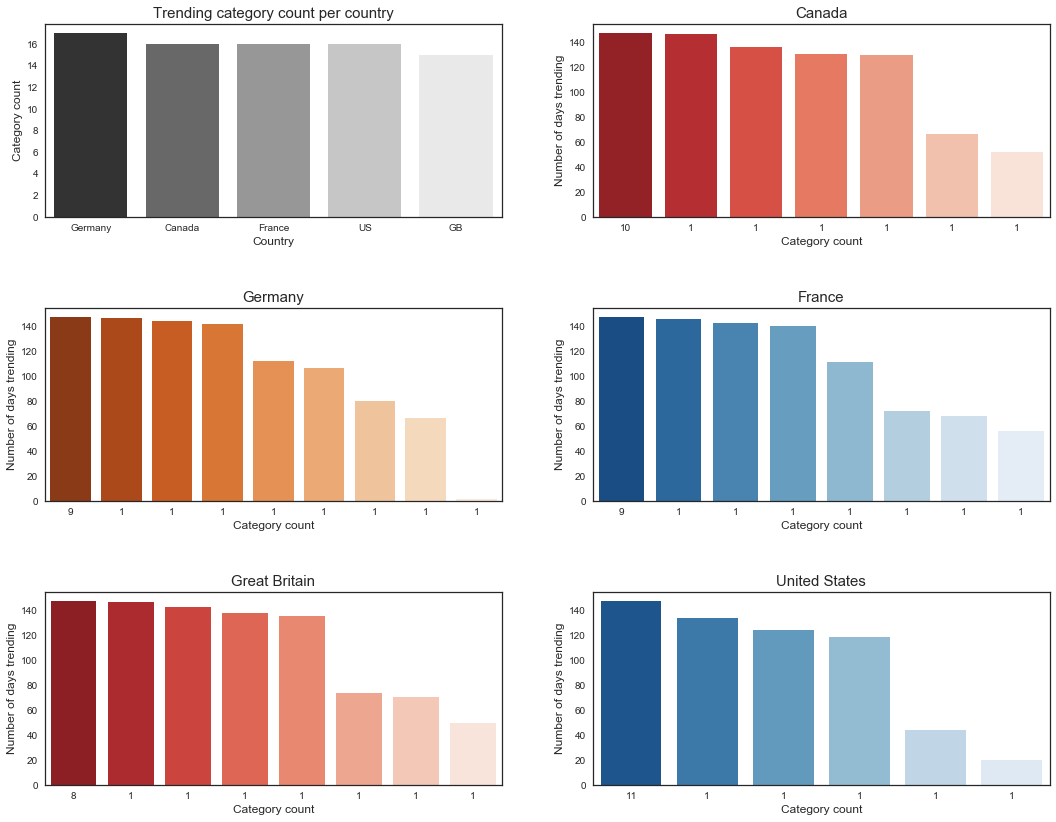

In [27]:
cat_trends = trend_durations('category_id', all_vids)

This is nice - we see that no particular category shows dominance in any of the countries. What may be of interest though is which category is the least popular in each country.

Let's take a look:

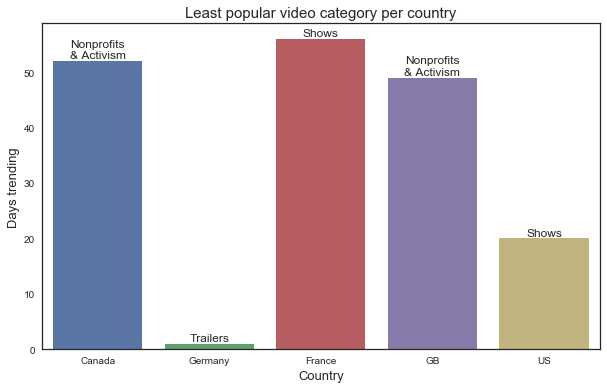

In [28]:
ca_cat_output = cat_trends[0]
de_cat_output = cat_trends[1]
fr_cat_output = cat_trends[2]
gb_cat_output = cat_trends[3]
us_cat_output = cat_trends[4]

ca_shortest_duration = ca_cat_output[0]['duration'].iloc[-1]
de_shortest_duration = de_cat_output[0]['duration'].iloc[-1]
fr_shortest_duration = fr_cat_output[0]['duration'].iloc[-1]
gb_shortest_duration = gb_cat_output[0]['duration'].iloc[-1]
us_shortest_duration = us_cat_output[0]['duration'].iloc[-1]

ca_id = ca_cat_output[1][ca_cat_output[1].duration == ca_shortest_duration].category_id.values[0]
de_id = de_cat_output[1][de_cat_output[1].duration == de_shortest_duration].category_id.values[0]
fr_id = fr_cat_output[1][fr_cat_output[1].duration == fr_shortest_duration].category_id.values[0]
gb_id = gb_cat_output[1][gb_cat_output[1].duration == gb_shortest_duration].category_id.values[0]
us_id = us_cat_output[1][us_cat_output[1].duration == us_shortest_duration].category_id.values[0]

shortest_trends_dict = {'country': ['Canada', 'Germany', 'France', 'GB', 'US'],
                        'duration': [ca_shortest_duration,
                                     de_shortest_duration,
                                     fr_shortest_duration,
                                     gb_shortest_duration,
                                     us_shortest_duration],
                        'cat_id': [ca_id,
                                   de_id,
                                   fr_id,
                                   gb_id,
                                   us_id]}

shortest_trends = pd.DataFrame(shortest_trends_dict)

ax = plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'country', y = 'duration', data = shortest_trends)

# Annotate each bar with the category name
cat_dicts = [ca_cat_dict, de_cat_dict, fr_cat_dict, gb_cat_dict, us_cat_dict]
for country, duration, cat_id in zip(ax.get_xticks(), shortest_trends['duration'], shortest_trends['cat_id']):
    ax.text(x = country,
            y = duration + 0.5,
            s = textwrap.fill(cat_dicts[country][cat_id], width = 11),
            size = 12,
            ha = 'center')

ax.set_xlabel('Country', fontsize = 13)
ax.set_ylabel('Days trending', fontsize = 13)
ax.set_title('Least popular video category per country', fontsize = 15)

plt.show()

The Germans absolutely loathe trailers! This graphic also shows that Nonprofits & Activism and Shows are generally the least popular YouTube video categories in the 5 countries under consideration.

How about channels? 

 - Which particular youtube channels are trending the longest?
 
The channel results happen to be too many to display meaningfully, so we will only display the top 25% of the results.

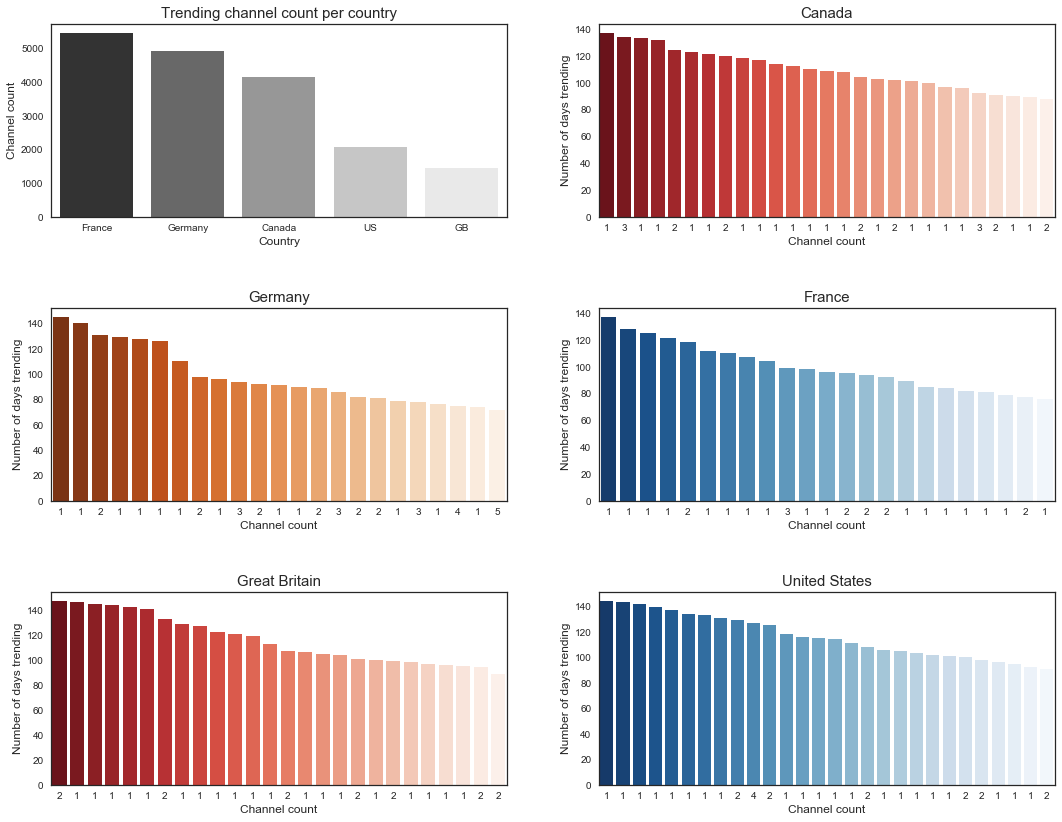

In [29]:
ch_trends = trend_durations('channel_title', all_vids, 0.25)

Another interesting set of charts! Generally, in each country there seems to be a channel that is the most popular. Let's find out which channels those are.

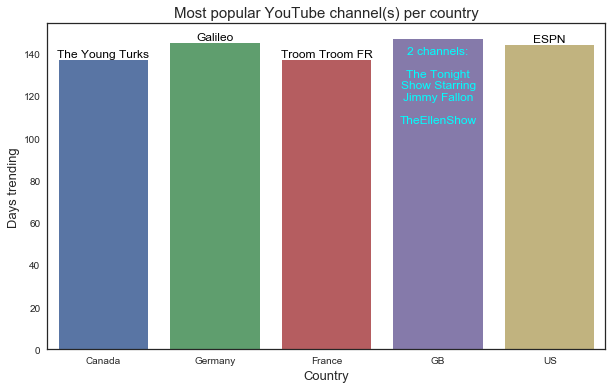

In [30]:
ca_ch_output = ch_trends[0]
de_ch_output = ch_trends[1]
fr_ch_output = ch_trends[2]
gb_ch_output = ch_trends[3]
us_ch_output = ch_trends[4]

ca_longest_duration = ca_ch_output[0]['duration'].iloc[0]
de_longest_duration = de_ch_output[0]['duration'].iloc[0]
fr_longest_duration = fr_ch_output[0]['duration'].iloc[0]
gb_longest_duration = gb_ch_output[0]['duration'].iloc[0]
us_longest_duration = us_ch_output[0]['duration'].iloc[0]

ca_id = ca_ch_output[1][ca_ch_output[1].duration == ca_longest_duration].channel_title.values[0]
de_id = de_ch_output[1][de_ch_output[1].duration == de_longest_duration].channel_title.values[0]
fr_id = fr_ch_output[1][fr_ch_output[1].duration == fr_longest_duration].channel_title.values[0]
# 2 top channels for the UK
gb_id1 = gb_ch_output[1][gb_ch_output[1].duration == gb_longest_duration].channel_title.values[0]
gb_id2 = gb_ch_output[1][gb_ch_output[1].duration == gb_longest_duration].channel_title.values[1]
us_id = us_ch_output[1][us_ch_output[1].duration == us_longest_duration].channel_title.values[0]

longest_trends_dict_ch = {'country': ['Canada', 'Germany', 'France', 'GB', 'US'],
                          'duration': [ca_longest_duration,
                                       de_longest_duration,
                                       fr_longest_duration,
                                       gb_longest_duration,
                                       us_longest_duration],
                          'ch_id': [ca_id,
                                    de_id,
                                    fr_id,
                                    '2 channels:\n\n' + textwrap.fill(gb_id1, width = 15) + '\n\n' + gb_id2,
                                    us_id]}

longest_trends_ch = pd.DataFrame(longest_trends_dict_ch)

ax = plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'country', y = 'duration', data = longest_trends_ch)

# Annotate each bar with the channel name(s)
for country, duration, ch_id in zip(ax.get_xticks(), longest_trends_ch['duration'], longest_trends_ch['ch_id']):
    ax.text(x = country,
            y = duration - 40 if country == 3 else duration + 1.5,
            s = ch_id,
            size = 12,
            color = 'aqua' if country == 3 else 'black',
            ha = 'center')

ax.set_xlabel('Country', fontsize = 13)
ax.set_ylabel('Days trending', fontsize = 13)
ax.set_title('Most popular YouTube channel(s) per country', fontsize = 15)

plt.show()

So... the British love American shows, and the Americans love ESPN the most! Interesting, but this could be because the data covers the period during which Super Bowl was held.

We would like to find out if there is any relationship between the title or tag or description of a video and its popularity or lack of popularity.

First of all, let's look at the kinds of words that are generally used in titles, tags and descriptions for the most popular videos. We will look at the top 100 videos (based on trend duration) in each country.

In [31]:
def display_wordclouds(word_type, rank_limit):
    
    # Top n videos (n = rank_limit)
    ca_top_n = ca_vid_output[1].sort_values('duration', ascending = False)[:rank_limit]
    de_top_n = de_vid_output[1].sort_values('duration', ascending = False)[:rank_limit]
    fr_top_n = fr_vid_output[1].sort_values('duration', ascending = False)[:rank_limit]
    gb_top_n = gb_vid_output[1].sort_values('duration', ascending = False)[:rank_limit]
    us_top_n = us_vid_output[1].sort_values('duration', ascending = False)[:rank_limit]
    
    w_type = word_type + 's' if word_type == 'tag' else word_type
    
    ca_top = ca_vids[ca_vids.video_id.isin(ca_top_n.video_id.values)][w_type]
    de_top = de_vids[de_vids.video_id.isin(de_top_n.video_id.values)][w_type]
    fr_top = fr_vids[fr_vids.video_id.isin(fr_top_n.video_id.values)][w_type]
    gb_top = gb_vids[gb_vids.video_id.isin(gb_top_n.video_id.values)][w_type]
    us_top = us_vids[us_vids.video_id.isin(us_top_n.video_id.values)][w_type]
    
    fig = plt.figure(figsize = (18, 14))
    gs = gridspec.GridSpec(5, 2, height_ratios = [1, 0, 1, 0, 1], width_ratios = [1, 1])
    
    # Plot the wordclouds
    # Descriptions tend to contain a great deal of hyperlinks,
    # so for word_type == 'description' we will remove hyperlinks with a line of regex

    # Canada wordcloud
    plt.subplot(gs[0, 0])
    ca_words = ' '.join([s.strip('"') for s in ' '.join([str(i) for i in ca_top]).split('|')])
    if word_type == 'description':
        ca_words = re.sub(r'http\S+', '', ca_words)
    ca_wordcloud = WordCloud(stopwords = STOPWORDS).generate(ca_words)
    plt.imshow(ca_wordcloud)
    plt.axis('off')
    plt.title('Canada ' + word_type + 's', fontsize = 15)

    # Germany wordcloud
    plt.subplot(gs[0, 1])
    de_words = ' '.join([s.strip('"') for s in ' '.join([str(i) for i in de_top]).split('|')])
    if word_type == 'description':
        de_words = re.sub(r'http\S+', '', de_words)
    de_wordcloud = WordCloud(stopwords = STOPWORDS).generate(de_words)
    plt.imshow(de_wordcloud)
    plt.axis('off')
    plt.title('Germany ' + word_type + 's', fontsize = 15)

    # France wordcloud
    plt.subplot(gs[2, 0])
    fr_words = ' '.join([s.strip('"') for s in ' '.join([str(i) for i in fr_top]).split('|')])
    if word_type == 'description':
        fr_words = re.sub(r'http\S+', '', fr_words)
    fr_wordcloud = WordCloud(stopwords = STOPWORDS).generate(fr_words)
    plt.imshow(fr_wordcloud)
    plt.axis('off')
    plt.title('France ' + word_type + 's', fontsize = 15)

    # Great Britain wordcloud
    plt.subplot(gs[2, 1])
    gb_words = ' '.join([s.strip('"') for s in ' '.join([str(i) for i in gb_top]).split('|')])
    if word_type == 'description':
        gb_words = re.sub(r'http\S+', '', gb_words)
    gb_wordcloud = WordCloud(stopwords = STOPWORDS).generate(gb_words)
    plt.imshow(gb_wordcloud)
    plt.axis('off')
    plt.title('UK ' + word_type + 's', fontsize = 15)

    # United States wordcloud
    plt.subplot(gs[4, 0])
    us_words = ' '.join([s.strip('"') for s in ' '.join([str(i) for i in us_top]).split('|')])
    if word_type == 'description':
        us_words = re.sub(r'http\S+', '', us_words)
    us_wordcloud = WordCloud(stopwords = STOPWORDS).generate(us_words)
    plt.imshow(us_wordcloud)
    plt.axis('off')
    plt.title('US ' + word_type + 's', fontsize = 15)

First we'll check out the title word clouds

<a id="plot2"></a>

### Plot 2

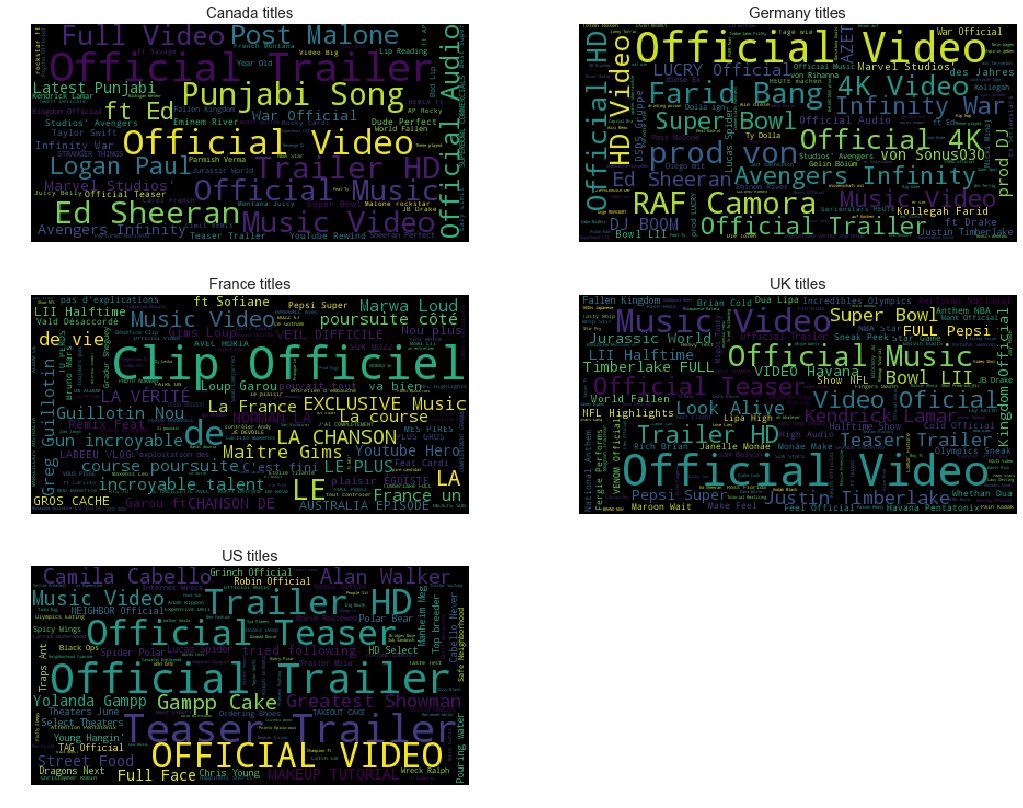

In [32]:
display_wordclouds('title', 100)

Well, two things are clear:
- Videos that are titled 'Official' are most likely to trend
- Americans love their trailers!

Let's look at the tag word clouds

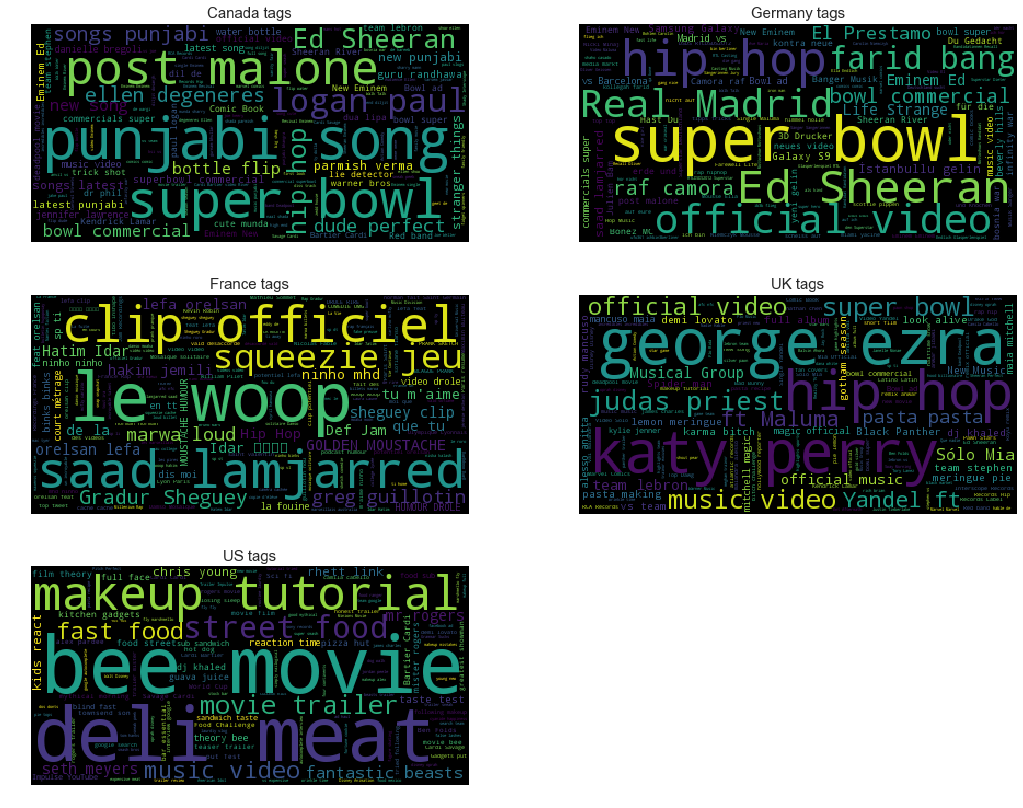

In [33]:
display_wordclouds('tag', 100)

Apparently during Super Bowl season (the data covers February when Super Bowl was held), the Canadians and Germans were more interested in Super Bowl tags than the Americans were!

So what can we learn from the words used to describe the most popular videos?

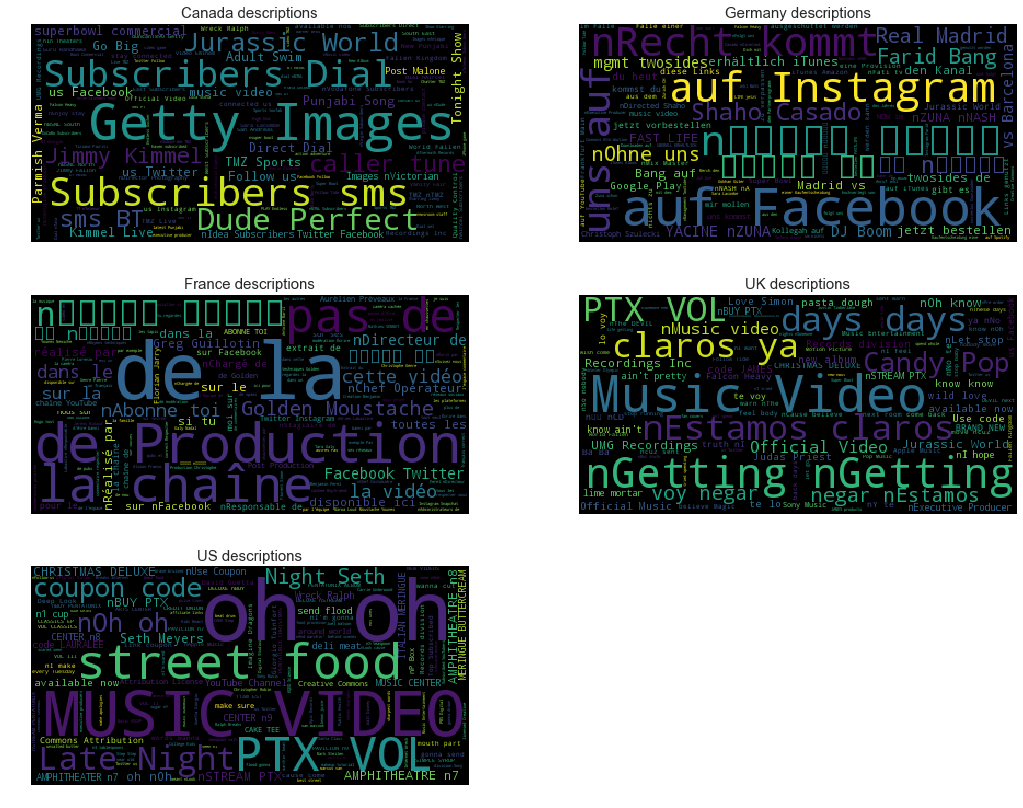

In [34]:
display_wordclouds('description', 100)

A few insights:
- In Canada, mobile phone communication seems to be the preferred method for connecting with youtube viewers (sms, dial, etc)
- German youtube publishers seem to be happier to connect via social media channels (facebook, instagram)
- American and British videos described as Music Video appear to be the most popular
- A little more work is required to process the French text in order to derive more meaningful information

This project is far from done, work still ongoing...